In [721]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams.update({'font.size': 16}) 

import numpy as np

# simple 1D least squares

In [722]:
x = np.linspace(-1, 1, 50)

# tw0 = 1
# tw1 = -1
# tw2 = 1
# y = tw0*x**0 + tw1*x**1 + tw2*x**2

# this is the same as the above
tw = np.array([12, -14, 13])
n_coeffs = len(tw)
y = [tw[i]*x**i for i in range(n_coeffs)]
y = np.sum(y, axis=0)
y += np.random.uniform(-0.5,0.5, size=len(x))

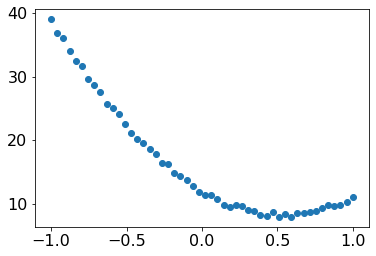

In [723]:
plt.figure()
plt.scatter(x, y)

In [724]:
# construct design matrix
N = len(x) # number of observations
M = 3 # number of parameters in model
Phi = np.zeros(shape=(N, M))

In [725]:
Phi.shape

(50, 3)

In [726]:
np.column_stack((np.zeros(100), np.zeros(100))).shape

(100, 2)

In [727]:
# out model will be the monomials x**m

In [728]:
def make_monomial(x, m):
    return x**m

In [729]:
Phi = np.column_stack([make_monomial(x, i) for i in range(M)])

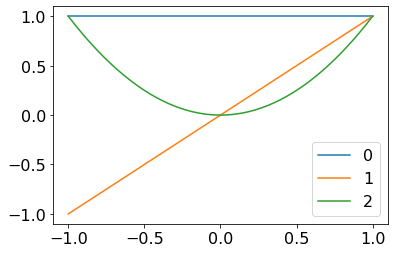

In [730]:
plt.figure()
for i in range(M):
    plt.plot(x, Phi[:,i], label=i)
plt.legend()

In [731]:
# to use least squares
# w_ml = np.linalg.lstsq(Phi, y, rcond=-1)[0]
# print(w_ml)

In [732]:
# to use moore-penrose
w_ml = np.dot(np.linalg.pinv(Phi), y)
print(w_ml)

[ 11.98224462 -13.99783613  12.96632034]


In [733]:
w_ml.shape

(3,)

In [734]:
w_ml

array([ 11.98224462, -13.99783613,  12.96632034])

In [735]:
x.shape

(50,)

In [736]:
prediction = np.sum([np.dot(w_ml[i], Phi[:,i]) for i in range(M)], axis=0)
# prediction = np.sum([w_ml[i] * Phi[:,i] for i in range(M)], axis=0)

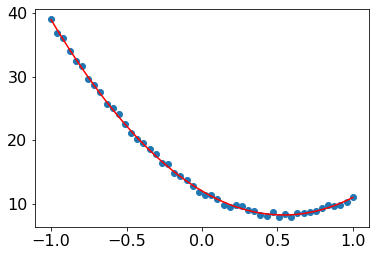

In [737]:
plt.figure()
plt.scatter(x, y)
plt.plot(x, prediction, c='r')

# class dev

In [739]:
class LinearRegression(object):
    def __init__(self):
        pass

    def make_monomial(self, x, m):
        return x**m
    
    def make_design_matrix(self, x, M):
        """
        input:
            x: np.ndarray. if a single feature then do x.reshape(-1, 1)
        

        returns:
            Phi: the design matrix

        the thing you invert with moore-penrose

        
        N, M = self.Phi.shape
        N = number of observations i.e. len(y)
        M = number of parameters in model
        """
        
        # construct design matrix
        N = x.shape[0] # number of observations
        # number of features would be x.shape[1]
        Phi = np.zeros(shape=(N, M))
        Phi = np.column_stack([self.make_monomial(x, i) for i in range(M)])
        return Phi
    
    def fit(self, x, y, M, method='direct'):
        """
        method:
            'direct': np.linalg.pinv. moore-penrose pseudo inverse
            'least-squres': np.linalg.lstsq. lapack least squares algorithm
            
        assigns the self.w_ml attribute.
        These are the maximum likelihood coefficients or weights.
        """
        
        Phi = self.make_design_matrix(x, M)
        
        if method == 'direct':
            self.w_ml = np.dot(np.linalg.pinv(Phi), y)
        elif method == 'least-squres':
            self.w_ml = np.linalg.lstsq(Phi, y, rcond=-1)[0]
    
    def predict(self, x):
        
        M = len(self.w_ml)
        Phi = self.make_design_matrix(x, M)
        
        N = Phi.shape[0]
        
        prediction = np.sum([np.dot(self.w_ml[i], Phi[:,i]) for i in range(M)], axis=0)
        return prediction
        
    
    def loss(self, x, y, method='sum-of-squares'):
        """
        method:
            'sum-of-squres':
            'RMSE': 
            'MSE': 
        """
        
        yhat = self.predict(x)
        
        def mse(y, yhat):
            """
            mean-squared-error function
            """
            errors = (y - yhat)
            loss = np.sum(errors**2, axis=0) / len(y)
            return loss
            
        if method == 'sum-of-squares':
            errors = (y - yhat)
            loss = np.sum(errors**2, axis=0) / 2.0
        elif method == 'MSE':
            loss = mse(y, yhat)
        elif method == 'RMSE':
            loss = np.sqrt(mse(y, yhat))
        else:
            raise ValueError(f"method = {method} not valid.")
            
        
        return loss

In [740]:
lr = LinearRegression()

In [741]:
lr.fit(x, y, 4)

In [742]:
lr.w_ml

array([ 11.98224462, -14.08926888,  12.96632034,   0.14649007])

In [743]:
lr.predict(x)

array([38.89134377, 37.29661335, 35.74368148, 34.23260791, 32.76345242,
       31.33627477, 29.95113474, 28.60809208, 27.30720656, 26.04853796,
       24.83214604, 23.65809056, 22.5264313 , 21.43722801, 20.39054047,
       19.38642844, 18.4249517 , 17.50617   , 16.63014312, 15.79693081,
       15.00659286, 14.25918902, 13.55477906, 12.89342275, 12.27517986,
       11.70011015, 11.16827339, 10.67972935, 10.23453779,  9.83275849,
        9.4744512 ,  9.15967569,  8.88849174,  8.66095911,  8.47713756,
        8.33708686,  8.24086679,  8.1885371 ,  8.18015756,  8.21578795,
        8.29548802,  8.41931755,  8.5873363 ,  8.79960403,  9.05618053,
        9.35712554,  9.70249884, 10.0923602 , 10.52676939, 11.00578616])

In [744]:
lr.loss(x, y, method='sum-of-squares')

1.8181979207761938

In [745]:
lr.loss(x, y, method='MSE')

0.07272791683104775

In [746]:
lr.loss(x, y, method='RMSE')

0.26968113918301323

In [747]:
xprime = np.linspace(-2,2,100)

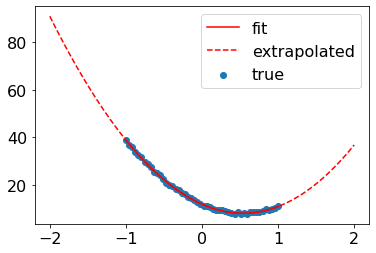

In [749]:
plt.figure()
plt.scatter(x, y, label='true')
plt.plot(x, lr.predict(x), c='r', label='fit')
plt.plot(xprime, lr.predict(xprime), c='r', ls='--', label='extrapolated')
plt.legend()